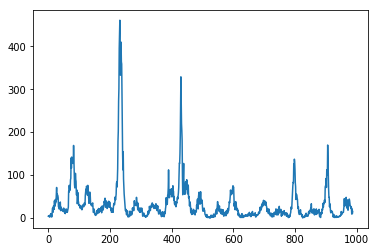

In [19]:
import sys
import numpy as np
import matplotlib.pyplot as plt
data = []
count = 0
with open ("/Users/gcgibson/Downloads/San_Juan_Training_Data.csv") as f:
        for line in f.readlines():
            if count > 0:
                data.append(line.replace("\n","").split(',')[-1])
            count +=1
data = np.array(data,dtype=np.float32)
plt.plot(data)
plt.show()



In [20]:
def create_lag_training_set(data,num_lag=4,step_ahead=1):
    X = []
    y = []
    
    for i in range(num_lag,len(data)-step_ahead):
        X.append(data[i-num_lag:i])
        y.append(data[i+step_ahead])
        
    return np.array(X),np.array(y)

X,y = create_lag_training_set(data)

In [32]:

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 1
epochs = 20

x_train = X[:len(X)-20]
x_test= X[len(X)-20:]
y_train= y[:len(X)-20]
y_test = y[len(X)-20:]
from keras.layers.core import Lambda
from keras import backend as K

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(4,)))
model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

from sklearn.metrics import mean_squared_error
nn_pred = []
num_mcmc_samples = 100
for s in range(num_mcmc_samples):
    nn_pred.append(model.predict(x_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               2560      
_________________________________________________________________
lambda_3 (Lambda)            (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 513       
Total params: 265,729
Trainable params: 265,729
Non-trainable params: 0
_________________________________________________________________


In [41]:
nn_pred_mean = np.mean(nn_pred,axis=0)

In [42]:
from statsmodels.tsa.ar_model import AR

model = AR(data[:len(data)-20])
model_fit = model.fit()
ar_predictions = model_fit.predict(start=len(data)-20, end=len(data)-1, dynamic=False)
print ("AR",mean_squared_error(ar_predictions,y_test))
print ("NN:",mean_squared_error(nn_pred_mean,y_test))

('AR', 162.89510262716323)
('NN:', 92.97561)


**Transfer leraning using SIR**

In [43]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [44]:
I

array([  1.        ,   1.10562053,   1.22234204,   1.3513191 ,
         1.49382365,   1.65125635,   1.82515884,   2.01722707,
         2.22932557,   2.46350299,   2.7220086 ,   3.00730991,
         3.32211145,   3.66937465,   4.0523386 ,   4.47454174,
         4.93984426,   5.45245089,   6.01693383,   6.63825544,
         7.32178998,   8.0733439 ,   8.89917375,   9.80600063,
        10.80102005,  11.89190567,  13.08680509,  14.39432578,
        15.82350878,  17.38378769,  19.08492966,  20.93695584,
        22.95003759,  25.13436512,  27.49998545,  30.05660664,
        32.81336559,  35.77855836,  38.95933214,  42.3613401 ,
        45.98836366,  49.84190696,  53.92077275,  58.22063343,
        62.73361225,  67.44789302,  72.34738271,  77.41145123,
        82.61477151,  87.92728803,  93.31433477,  98.73691852,
       104.15218163, 109.51404327, 114.77400588, 119.88211691,
       124.78804762, 129.44224339, 133.79710874, 137.80816356,
       141.4351244 , 144.6428585 , 147.40216923, 149.69

In [46]:

X,y = create_lag_training_set(I)

x_train = X[:len(X)-20]
x_test= X[len(X)-20:]
y_train= y[:len(X)-20]
y_test = y[len(X)-20:]
from keras.layers.core import Lambda
from keras import backend as K

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(4,)))
model.add(Lambda(lambda x: K.dropout(x, level=0.5)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))


    
model.layers[0].trainable = False

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 512)               2560      
_________________________________________________________________
lambda_5 (Lambda)            (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 513       
Total params: 265,729
Trainable params: 265,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X,y = create_lag_training_set(data)

x_train = X[:len(X)-20]
x_test= X[len(X)-20:]
y_train= y[:len(X)-20]
y_test = y[len(X)-20:]
model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0)


/Users/gcgibson/anaconda/lib/python2.7/site-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
